**Importing dependencies**

In [2]:
try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import logging
import numpy as np
import matplotlib.pyplot as plt

TensorFlow 2.x selected.


**Logging**

Set logging level to only display errors

In [0]:
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

**Prepare the training data**

`celsius` is an array for our input values whereas `fahrenheit` is an array of expected output which should be predicted by our model after training

In [0]:
celsius = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

**Verifying that data**

In [5]:
for index, c in enumerate(celsius):
  print(c, fahrenheit[index], sep='C = ', end='F\n')

-40.0C = -40.0F
-10.0C = 14.0F
0.0C = 32.0F
8.0C = 46.0F
15.0C = 59.0F
22.0C = 72.0F
38.0C = 100.0F


**Creating the model**

`tf.keras.Sequential` creates a neural net by taking layers from input to output sequentially

In [0]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([l0])

**Setting the loss and optimizer**

Using simple `mean_squared_error` metric for `loss`, it allows for a large
number of small errors as acceptable and doesn't allow few large errors.
Using TensorFlow's default `Adam` optimizer to adjust weights to reduce loss value
typical optimizer values range from 0.1 to 0.001 (lower the value more accurate the results and higher the training time)

In [0]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

**Training the model**

The model can be trained by calling the `fit` method on the model object.

In [0]:
model_history = model.fit(celsius, fahrenheit, epochs=500, verbose=False)

**Model history**

`model_history` contains various training performance parameters and their values. Using these values we can plot graphs or view the changing parameter values over time.

In [9]:
print(model_history.history.keys())

dict_keys(['loss'])


**Plotting the performance parameters**

Validating the model's loss against the number of training epochs.

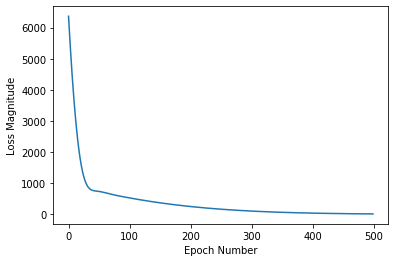

In [10]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(model_history.history['loss'])

**Predictions**

Verifying the accuracy of the model by calling the `predict` method.



In [11]:
print(model.predict([100.0]))
print(model.predict([32.0]))

[[211.29051]]
[[87.056526]]


**Checking the weights adjusted during training**

In [12]:
print("Weights: {}".format(l0.get_weights()))

Weights: [array([[1.8269703]], dtype=float32), array([28.593477], dtype=float32)]


The generated weights are pretty close to the actual formula for converting degree celsius to degree fahrenheit, which is `celsius * 1.8 + 32`

**Experimentation**

Verifying the output prediction and layer weights with more dense layers

[[211.74744]]
[[89.48689]]
Layer 0 Weights: [array([[ 0.18612695, -0.21846738,  0.40378767, -0.7721827 ]],
      dtype=float32), array([ 2.7168913,  2.552879 , -1.5084519, -3.294549 ], dtype=float32)]
Layer 1 Weights: [array([[-0.38830087,  0.03314761, -0.9709594 , -0.9386489 ],
       [-0.88595283, -0.18225773, -0.7594123 , -0.35521835],
       [ 0.03544688,  1.4846716 ,  0.16139394,  0.26130348],
       [ 0.30721635,  1.0698545 ,  1.3727964 ,  0.5545366 ]],
      dtype=float32), array([-2.1500988, -1.9500548, -3.2604473, -3.2656913], dtype=float32)]
Layer 2 Weights: [array([[-0.24504234],
       [-0.3282559 ],
       [-1.3328084 ],
       [-0.8766526 ]], dtype=float32), array([3.057915], dtype=float32)]


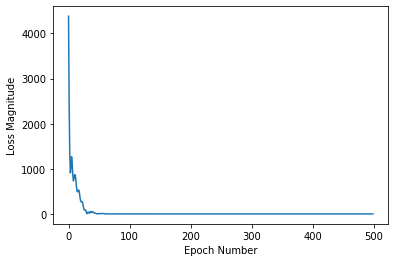

In [14]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)

model = tf.keras.Sequential([l0, l1, l2])

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

model_history = model.fit(celsius, fahrenheit, epochs=500, verbose=False)

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(model_history.history['loss'])

print(model.predict([100.0]))
print(model.predict([32.0]))

print("Layer 0 Weights: {}".format(l0.get_weights()))
print("Layer 1 Weights: {}".format(l1.get_weights()))
print("Layer 2 Weights: {}".format(l2.get_weights()))

The loss graph shows how quickly the model is able to train on the given dataset once we increase the number of units and dense layers. Increasing the number of layers directly increases the learning capacity of the model at the cost of increasing the time it takes to train it. However, in this case the size of our dataset is extremely small so it doesnt really impact the training time.